In [29]:
!pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\nNaaz\AppData\Local\pip\Cache\wheels\0c\3e\07\4848195c61f659184ca41d5a614845a018ab2d2f2a705b9998
Successfully built plotly


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
import os
import plotly
import plotly.graph_objs as go

In [4]:

from sklearn.decomposition import PCA

In [5]:
df=pd.read_csv('Kmeans_analysis.csv')
df_test=df.fillna(0)
#df_test.round(2)
df_test.head()

#pd.to_numeric(df_test['OTP_SalesPerWk'])

,Selling Plant,RCS,ChainID,Deliveries,Cartons_perWeek,Cartons_PPC,OTP_SalesPerWk,OtherGM_SalesPerWk,GP_percent,Fess_PerWk
0,Eau Claire,Dawn Stahnke,1089.0,5.0,181.0,2.20,1561.75,4058.05,10.24,16.75
1,Eau Claire,Dawn Stahnke,1740.0,5.0,205.0,1.68,2067.13,4376.20,12.58,14.33
2,Eau Claire,Dawn Stahnke,1143.0,8.0,131.0,2.50,1887.25,3744.63,9.10,16.75
3,Eau Claire,Eric Nyberg,342.0,4.0,269.0,0.58,3404.30,3742.82,8.59,16.75
4,Eau Claire,Mary Suda,808.0,8.0,132.0,0.10,1569.57,3972.30,13.03,6.56


In [6]:
X=df_test.iloc[:,[4,6]]
X.head()

,Cartons_perWeek,OTP_SalesPerWk
0,181.0,1561.75
1,205.0,2067.13
2,131.0,1887.25
3,269.0,3404.30
4,132.0,1569.57


In [7]:
#find no of optimal clusters
wcss=[]

In [8]:
 #15 clusters
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
   

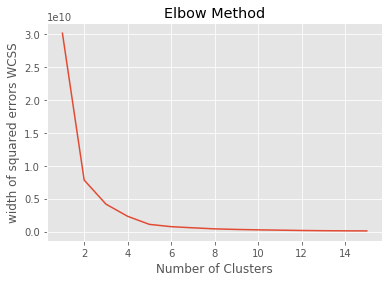

In [9]:
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('width of squared errors WCSS')
plt.show()


In [11]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)
y=kmeans.fit_predict(X)
X['clusters']=kmeans.labels_

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
cluster1=X.loc[X['clusters'] == 0]
cluster2=X.loc[X['clusters'] == 1]
cluster1.values

array([[0.0000000e+00, 1.0251760e+05, 0.0000000e+00],
       [5.4000000e+01, 1.0258597e+05, 0.0000000e+00],
       [0.0000000e+00, 4.2945830e+04, 0.0000000e+00],
       [0.0000000e+00, 5.2897600e+04, 0.0000000e+00]])

In [37]:
scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    x = cluster1.values,
    marker = dict( size=2, color='green')
)
scatter1

{'marker': {'color': 'green', 'size': 2},
 'mode': 'markers',
 'name': 'Cluster 1',
 'x': <function dict.values>}

In [32]:
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
     
    x = cluster2.values,
    marker = dict( size=2, color='blue')
)

cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
       
    x = cluster1.values,
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
     
    x = cluster2.values,
    color='blue', showscale = True
)

layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)


In [36]:
fig = dict( data=[scatter1, scatter2, cluster1, cluster2], layout=layout )
# Use py.iplot() for IPython notebook
plotly..iplot(fig, filename='mesh3d_sample',validate=False)

TypeError: Object of type 'builtin_function_or_method' is not JSON serializable

In [44]:
plt.scatter(X[:,0], X[:,1],s=25,c='blue',label='Cluster 2')

TypeError: unhashable type: 'slice'

In [229]:

plt.scatter(X[y== 1,0],X[y==1,1],s=25,c='blue',label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=25,c='yellow',label='Centroid')
plt.title('KMeans Clustering')
plt.xlabel('ChainID')
plt.ylabel('OTP_SalesPerWk')
plt.legend()
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

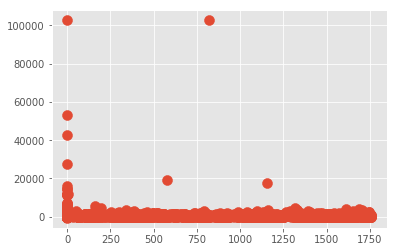

In [11]:
plt.scatter(df_test['Chain #'],df_test['OTP Sales/Wk'],s=100)

In [13]:
clf=KMeans(n_clusters=2)
clf.fit(df_test)
centroids=clf.cluster_centers_
labels=clf.labels_
colors=['g.','r.']

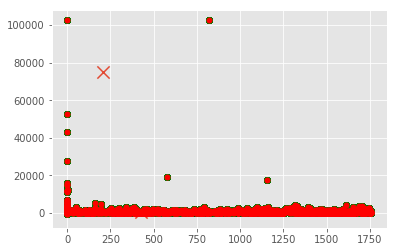

In [15]:
for i in range(len(df_test)):
    plt.plot(df_test['Chain #'],df_test['OTP Sales/Wk'],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5)

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_test)
labels = kmeans.labels_

In [53]:
df_test['clusters'] = labels

In [54]:
df_test.groupby(['clusters']).mean()

,Chain #,Deliveries,Cartons per Week,Cartons PPC,OTP Sales/Wk,Other GM Sales/Wk,Controllable GP %,Fees/Wk
clusters,,,,,,,,
0,124.071429,6.428571,176.875000,0.640637,19723.444821,1545.275714,2.990807,9.736964
1,425.788454,3.773562,79.723412,1.412804,498.479709,659.129650,15.340291,12.772730
2,411.500000,15.500000,27.125000,0.323410,102551.780000,30830.212500,3.380643,8.375000


In [55]:
#os.makedirs('KMeans')
writer = pd.ExcelWriter('KMeans/kmeans3.xlsx')
df_test.to_excel(writer,'KMeans_3')
writer.save()
